# Mission. 데이터 분석해보기

## 서울시 전력 사용량 (용도별) 통계
- https://data.seoul.go.kr/dataList/datasetView.do?infId=378&srvType=S&serviceKind=2&currentPageNo=1&searchValue=&searchKey=null

In [ ]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

### 데이터 불러오기

In [2]:
df_elec_seoul = pd.read_excel('./data/seoul_electronic.xls', encoding='utf-8')
df_elec_seoul

,기간,지역,합계,가정용,공공용,서비스업,서비스업.1,서비스업.2,서비스업.3,서비스업.4,산업용,산업용.1,산업용.2,산업용.3
0,기간,지역,합계,가정용,공공용,소계,전철,수도,사업자용,순수서비스,소계,농림어업,광업,제조업
1,2017,합계,46298158,13131172,3581534,27647345,1497676,656555,93169,25399945,1938108,15150,4064,1918893
2,2017,종로구,1753575,250888,195454,1234839,-,2584,3147,1229108,72395,105,611,71679
3,2017,중구,2503707,188818,111809,1976573,-,312,10228,1966032,226508,30,197,226281
4,2017,용산구,1389969,388850,330599,647404,6519,6170,483,634231,23117,24,30,23062
5,2017,성동구,2034589,414136,301407,879368,119118,52218,3671,704361,439679,55,319,439305
6,2017,광진구,1638532,452493,100824,1048653,322117,53113,3212,670210,36561,228,71,36262
7,2017,동대문구,1424697,479096,127492,739444,60376,8876,2145,668048,78664,260,82,78322
8,2017,중랑구,1101396,501147,38418,500256,1736,5719,1968,490833,61574,397,51,61125
9,2017,성북구,1440110,579150,216370,594326,-,17833,1140,575353,50264,265,27,49971


### 데이터 정리하기

In [3]:
electronic = pd.read_excel('./data/seoul_electronic.xls',
                          header=1,
                          parse_cols="B, C, D, E, F, K",
                          encoding='utf-8')
electronic.head()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,지역,합계,가정용,공공용,소계,소계.1
0,합계,46298158,13131172,3581534,27647345,1938108
1,종로구,1753575,250888,195454,1234839,72395
2,중구,2503707,188818,111809,1976573,226508
3,용산구,1389969,388850,330599,647404,23117
4,성동구,2034589,414136,301407,879368,439679


In [4]:
electronic.rename(columns = {electronic.columns[0] : '구',
                            electronic.columns[1] : '총전력량',
                            electronic.columns[2] : '가정용',
                            electronic.columns[3] : '공공용',
                            electronic.columns[4] : '서비스업',
                            electronic.columns[5] : '산업용'}, inplace=True)
electronic.head()

,구,총전력량,가정용,공공용,서비스업,산업용
0,합계,46298158,13131172,3581534,27647345,1938108
1,종로구,1753575,250888,195454,1234839,72395
2,중구,2503707,188818,111809,1976573,226508
3,용산구,1389969,388850,330599,647404,23117
4,성동구,2034589,414136,301407,879368,439679


In [5]:
electronic.drop([0], inplace=True)
electronic.head()

,구,총전력량,가정용,공공용,서비스업,산업용
1,종로구,1753575,250888,195454,1234839,72395
2,중구,2503707,188818,111809,1976573,226508
3,용산구,1389969,388850,330599,647404,23117
4,성동구,2034589,414136,301407,879368,439679
5,광진구,1638532,452493,100824,1048653,36561


In [6]:
electronic['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [7]:
electronic.set_index('구', inplace=True)
electronic.head()

,총전력량,가정용,공공용,서비스업,산업용
구,,,,,
종로구,1753575,250888,195454,1234839,72395
중구,2503707,188818,111809,1976573,226508
용산구,1389969,388850,330599,647404,23117
성동구,2034589,414136,301407,879368,439679
광진구,1638532,452493,100824,1048653,36561


In [8]:
electronic.sort_values(by='총전력량', ascending=False).head()

,총전력량,가정용,공공용,서비스업,산업용
구,,,,,
강남구,4615922,863427,122679,3610427,19389
서초구,3386610,668483,199768,2505446,12912
송파구,2684727,856056,89031,1700901,38739
영등포구,2610039,554765,158873,1772074,124327
중구,2503707,188818,111809,1976573,226508


### 시각화하기(그래프로 만들기)

\# 막대그래프

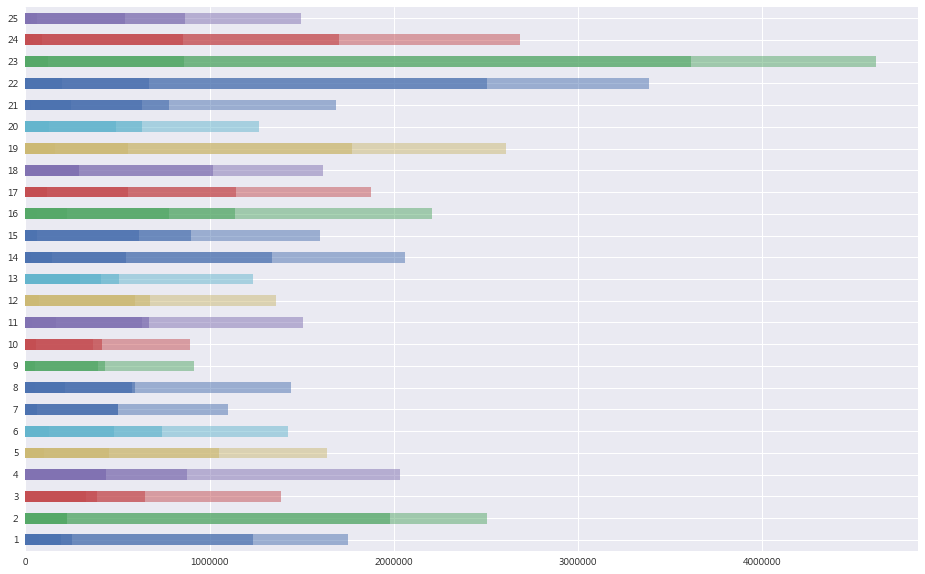

In [36]:
plt.figure()
electronic['총전력량'].plot(kind='barh', grid=True, figsize=(16,10), alpha=0.5)
electronic['서비스업'].plot(kind='barh', grid=True, figsize=(16,10), alpha=0.6)
electronic['가정용'].plot(kind='barh', grid=True, figsize=(16,10), alpha=0.7)
electronic['공공용'].plot(kind='barh', grid=True, figsize=(16,10), alpha=0.8)
electronic['산업용'].plot(kind='barh', grid=True, figsize=(16,10))

plt.show()

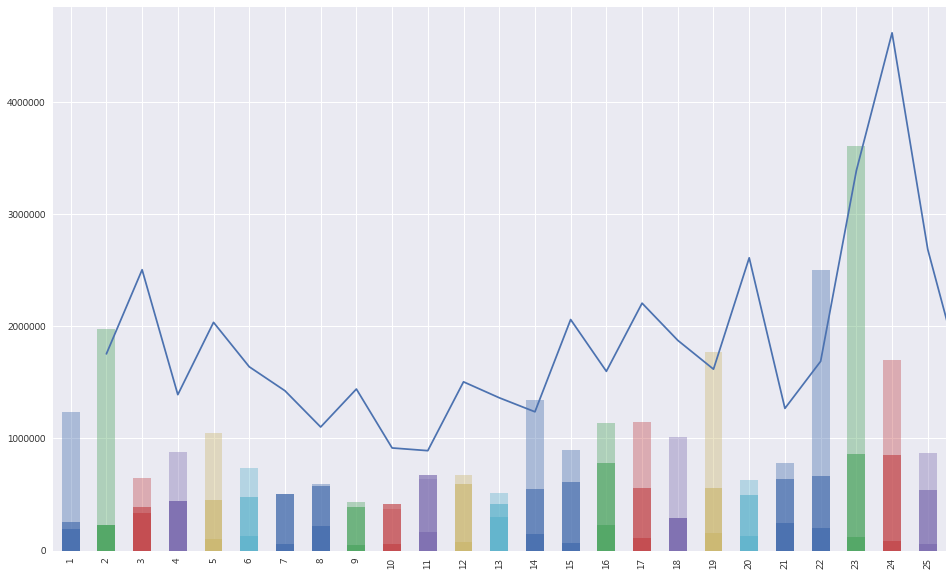

In [38]:
plt.figure()
electronic['총전력량'].plot(kind='line', grid=True, figsize=(16,10))
electronic['서비스업'].plot(kind='bar', grid=True, figsize=(16,10), alpha=0.4)
electronic['가정용'].plot(kind='bar', grid=True, figsize=(16,10), alpha=0.7)
electronic['공공용'].plot(kind='bar', grid=True, figsize=(16,10))
electronic['산업용'].plot(kind='bar', grid=True, figsize=(16,10))

plt.show()

\# 상관관계 분석하기

In [10]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

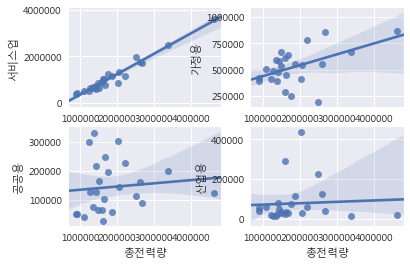

In [11]:
plt.subplot(221)
sns.regplot(x='총전력량', y='서비스업', data=electronic)

plt.subplot(222)
sns.regplot(x='총전력량', y='가정용', data=electronic)

plt.subplot(223)
sns.regplot(x='총전력량', y='공공용', data=electronic)

plt.subplot(224)
sns.regplot(x='총전력량', y='산업용', data=electronic)

plt.show()

### folium 사용해 매핑하기

In [12]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [13]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
#geo_str

In [14]:
df_elec_seoul = pd.read_excel('./data/seoul_electronic.xls', encoding='utf-8')
df_elec_seoul

,기간,지역,합계,가정용,공공용,서비스업,서비스업.1,서비스업.2,서비스업.3,서비스업.4,산업용,산업용.1,산업용.2,산업용.3
0,기간,지역,합계,가정용,공공용,소계,전철,수도,사업자용,순수서비스,소계,농림어업,광업,제조업
1,2017,합계,46298158,13131172,3581534,27647345,1497676,656555,93169,25399945,1938108,15150,4064,1918893
2,2017,종로구,1753575,250888,195454,1234839,-,2584,3147,1229108,72395,105,611,71679
3,2017,중구,2503707,188818,111809,1976573,-,312,10228,1966032,226508,30,197,226281
4,2017,용산구,1389969,388850,330599,647404,6519,6170,483,634231,23117,24,30,23062
5,2017,성동구,2034589,414136,301407,879368,119118,52218,3671,704361,439679,55,319,439305
6,2017,광진구,1638532,452493,100824,1048653,322117,53113,3212,670210,36561,228,71,36262
7,2017,동대문구,1424697,479096,127492,739444,60376,8876,2145,668048,78664,260,82,78322
8,2017,중랑구,1101396,501147,38418,500256,1736,5719,1968,490833,61574,397,51,61125
9,2017,성북구,1440110,579150,216370,594326,-,17833,1140,575353,50264,265,27,49971


In [15]:
electronic = pd.read_excel('./data/seoul_electronic.xls',
                          header=1,
                          parse_cols="B, C, D, E, F, K",
                          encoding='utf-8')
electronic.head()

,지역,합계,가정용,공공용,소계,소계.1
0,합계,46298158,13131172,3581534,27647345,1938108
1,종로구,1753575,250888,195454,1234839,72395
2,중구,2503707,188818,111809,1976573,226508
3,용산구,1389969,388850,330599,647404,23117
4,성동구,2034589,414136,301407,879368,439679


In [20]:
electronic.drop([0], inplace=True)
electronic.head()

,구,총전력량,가정용,공공용,서비스업,산업용
1,종로구,1753575,250888,195454,1234839,72395
2,중구,2503707,188818,111809,1976573,226508
3,용산구,1389969,388850,330599,647404,23117
4,성동구,2034589,414136,301407,879368,439679
5,광진구,1638532,452493,100824,1048653,36561


In [21]:
electronic.rename(columns = {electronic.columns[0] : '구',
                            electronic.columns[1] : '총전력량',
                            electronic.columns[2] : '가정용',
                            electronic.columns[3] : '공공용',
                            electronic.columns[4] : '서비스업',
                            electronic.columns[5] : '산업용'}, inplace=True)
electronic.head()

,구,총전력량,가정용,공공용,서비스업,산업용
1,종로구,1753575,250888,195454,1234839,72395
2,중구,2503707,188818,111809,1976573,226508
3,용산구,1389969,388850,330599,647404,23117
4,성동구,2034589,414136,301407,879368,439679
5,광진구,1638532,452493,100824,1048653,36561


In [22]:
guElec = pd.DataFrame({'gu':electronic['구'], 'counts':electronic['총전력량']})
guElec.head()

,gu,counts
1,종로구,1753575
2,중구,2503707
3,용산구,1389969
4,성동구,2034589
5,광진구,1638532


In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [24]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guElec,
              columns=['gu','counts'],
              fill_color='PuRd',
              key_on='feature.id')
map

In [25]:
guElec = pd.DataFrame({'gu':electronic['구'], 'counts':electronic['서비스업']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guElec,
              columns=['gu','counts'],
              fill_color='PuRd',
              key_on='feature.id')
map

In [26]:
guElec = pd.DataFrame({'gu':electronic['구'], 'counts':electronic['가정용']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guElec,
              columns=['gu','counts'],
              fill_color='PuRd',
              key_on='feature.id')
map

In [27]:
guElec = pd.DataFrame({'gu':electronic['구'], 'counts':electronic['공공용']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guElec,
              columns=['gu','counts'],
              fill_color='PuRd',
              key_on='feature.id')
map

In [28]:
guElec = pd.DataFrame({'gu':electronic['구'], 'counts':electronic['산업용']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guElec,
              columns=['gu','counts'],
              fill_color='PuRd',
              key_on='feature.id')
map

\# 비율로 구해보기

In [29]:
electronic['서비스업전력사용비율'] = electronic['서비스업']/electronic['총전력량']*100
electronic.head()

,구,총전력량,가정용,공공용,서비스업,산업용,서비스업전력사용비율
1,종로구,1753575,250888,195454,1234839,72395,70.418374
2,중구,2503707,188818,111809,1976573,226508,78.945859
3,용산구,1389969,388850,330599,647404,23117,46.576866
4,성동구,2034589,414136,301407,879368,439679,43.220916
5,광진구,1638532,452493,100824,1048653,36561,63.999543


In [30]:
guElec = pd.DataFrame({'gu':electronic['구'], 'counts':electronic['서비스업전력사용비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guElec,
              columns=['gu','counts'],
              fill_color='PuRd',
              key_on='feature.id')
map

\# 마커 추가하기

In [35]:
folium.Marker([37.501554, 127.039649], popup='This is Multicampus!!!!').add_to(map)
folium.CircleMarker([37.501554, 127.039649], radius=30, popup='Bigdata hahahah!!!!', color='#3186cc', fill_color='#3186cc').add_to(map)
folium.RegularPolygonMarker([37.579838, 126.977009], popup='Please give me the fxxxing ticket!!!!', fill_color='#769d96', number_of_sides=5, radius=10).add_to(map)
map